In [9]:
import cv2
import pandas as pd
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from utils import detectAirportRunway2

In [10]:
## image path 
imgdir = "data/LARD_test_real/LARD_test_real_edge_cases" # 原图文件夹
crops_dir = "images_cropped"  # ROI文件夹
csv_path = "data/LARD_test_real/LARD_test_real_edge_cases/Test_Real_Edge_Cases.csv"  # csv文件路径

In [11]:
## 根据真值裁剪ROI
def crop_and_save(image_dir, image_name, save_dir, x_A, y_A, x_B, y_B, x_C, y_C, x_D, y_D, show_points=False):
    # 读取原始图片
    img = Image.open(image_dir + '/' + image_name)
    
    ## 计算上下左右界
    lb = min(x_A, x_B, x_C, x_D)    # left bound
    rb = max(x_A, x_B, x_C, x_D)    # right bound
    tb = min(y_A, y_B, y_C, y_D)    # top bound 
    bb = max(y_A, y_B, y_C, y_D)    # bottom bound 
    
    # 计算原始区域的宽度和高度
    original_width = rb - lb 
    original_height = bb - tb 
    
    # 计算扩大后的宽度和高度
    # new_width = original_width * 2
    # new_height = original_height * 2
    
    ## 计算新的上下左右界
    new_lb = lb - (original_width // 2) if lb - (original_width // 2) > 0 else 0  # left bound
    new_rb = rb + (original_width // 2) if rb + (original_width // 2) < img.width else img.width  # right bound
    new_tb = tb - (original_height // 2) if tb - (original_height // 2) > 0 else 0  # top bound
    new_bb = bb + (original_height // 2) if bb + (original_height // 2) < img.height else img.height  # bottom bound
    
    # 计算截取区域的新坐标
    new_x_A = x_A - new_lb
    new_y_A = y_A - new_tb
    new_x_B = x_B - new_lb
    new_y_B = y_B - new_tb
    new_x_C = x_C - new_lb
    new_y_C = y_C - new_tb
    new_x_D = x_D - new_lb
    new_y_D = y_D - new_tb
    
    # 截取区域并保存为新的图片
    # (left, upper, right, lower)-tuple.
    cropped_img = img.crop((new_lb, new_tb, new_rb, new_bb))
    # plt.imshow(cropped_img)
    cropped_img.save(save_dir + '/' + image_name)
    if show_points:
        # 四个点的坐标
        points = {  'A': (new_x_A, new_y_A), 
                    'B': (new_x_B, new_y_B), 
                    'C': (new_x_C, new_y_C), 
                    'D': (new_x_D, new_y_D)}

        plt.figure(figsize=(10,10))
        # 绘制图片
        plt.imshow(cropped_img)

        # 绘制四个点
        for label, point in points.items():
            plt.scatter(point[0], point[1], color='red', )
            plt.text(point[0], point[1], label, fontsize=12, color='red')

        # 显示标记点
        plt.show()
    
    return new_x_A, new_y_A, new_x_B, new_y_B, new_x_C, new_y_C, new_x_D, new_y_D

In [12]:
# 读取csv 
df = pd.read_csv(csv_path, sep=';')
df.head()

,image,height,width,type,original_dataset,scenario,airport,runway,time_to_landing,weather,...,roll,watermark_height,x_A,y_A,x_B,y_B,x_C,y_C,x_D,y_D
0,images/-PJP3pgLgjI_022.png,2160,3840,real,REAL_Edge_Cases,NaN,EBBR,25L,30,rain,...,NaN,NaN,2038,1276,2055,1277,2017,1352,2069,1355
1,images/-PJP3pgLgjI_025.png,2160,3840,real,REAL_Edge_Cases,NaN,EBBR,25L,24,rain,...,NaN,NaN,1771,1327,1788,1327,1744,1413,1812,1413
2,images/-PJP3pgLgjI_027.png,2160,3840,real,REAL_Edge_Cases,NaN,EBBR,25L,20,rain,...,NaN,NaN,2018,1374,2037,1375,1986,1472,2069,1474
3,images/-PJP3pgLgjI_029.png,2160,3840,real,REAL_Edge_Cases,NaN,EBBR,25L,16,rain,...,NaN,NaN,1841,1319,1862,1319,1789,1438,1900,1442
4,images/-PJP3pgLgjI_030.png,2160,3840,real,REAL_Edge_Cases,NaN,EBBR,25L,14,rain,...,NaN,NaN,2016,1327,2037,1328,1952,1456,2089,1464


In [13]:
# 遍历 DataFrame 的每一行，裁剪并存储
crops_frame = {'image': [], 'x_A': [], 'y_A': [], 'x_B': [], 'y_B': [], 'x_C': [], 'y_C': [], 'x_D': [], 'y_D': [], 'slope_L': [], 'slope_R': []}
crops_df = pd.DataFrame(crops_frame)
for index, row in df.iterrows():
    # 使用列名称索引获取需要的元素
    img_path = row['image'] 
    x_A = row['x_A']
    y_A = row['y_A']
    x_B = row['x_B']
    y_B = row['y_B']
    x_C = row['x_C']
    y_C = row['y_C']
    x_D = row['x_D']
    y_D = row['y_D']
    
    ## 裁剪区域，获得新的四点坐标
    x_A, y_A, x_B, y_B, x_C, y_C, x_D, y_D = \
        crop_and_save(imgdir, img_path, crops_dir, x_A, y_A, x_B, y_B, x_C, y_C, x_D, y_D)
    
    try:
        if x_A < x_B:
            if x_C < x_D:
                slope_L = (y_C - y_A) / (x_C - x_A)
                slope_R = (y_D - y_B) / (x_D - x_B)
            else:
                slope_L = (y_D - y_A) / (x_D - x_A)
                slope_R = (y_C - y_B) / (x_C - x_B)
        else:
            if x_C < x_D:
                slope_L = (y_C - y_B) / (x_C - x_B)
                slope_R = (y_D - y_A) / (x_D - x_A)
            else:
                slope_L = (y_D - y_B) / (x_D - x_B)
                slope_R = (y_C - y_A) / (x_C - x_A)
    except ZeroDivisionError:   # slope是0就跳过
        continue

    ## 把新的四点坐标存起来
    crops_df.loc[index] = [img_path, x_A, y_A, x_B, y_B, x_C, y_C, x_D, y_D, slope_L, slope_R]

## 存储crops_df
crops_df.to_csv(crops_dir+'/'+'groundtruth.csv', index=False)

In [14]:
crops_df = pd.read_csv(crops_dir + '/' + 'groundtruth.csv', sep=',')
crops_df.head()

,image,x_A,y_A,x_B,y_B,x_C,y_C,x_D,y_D,slope_L,slope_R
0,images/-PJP3pgLgjI_022.png,47,39,64,40,26,115,78,118,-3.619048,5.571429
1,images/-PJP3pgLgjI_025.png,61,43,78,43,34,129,102,129,-3.185185,3.583333
2,images/-PJP3pgLgjI_027.png,73,50,92,51,41,148,124,150,-3.062500,3.093750
3,images/-PJP3pgLgjI_029.png,107,61,128,61,55,180,166,184,-2.288462,3.236842
4,images/-PJP3pgLgjI_030.png,132,68,153,69,68,197,205,205,-2.015625,2.615385


In [18]:
## 调用上交程序
line_df = pd.DataFrame({'image': [], 
                        'slope_L': [], 
                        'slope_R': []})

theta_error_list = []

for index, row in crops_df.iterrows():
    img_path = row['image']
    img = cv2.imread(crops_dir + "/" + img_path)

    # detect lines
    line_L, line_R = detectAirportRunway2(img, res_name=img_path[7:-1], draw=True)

    if line_L is None:
        continue

    theta_L = line_L[1]
    theta_R = line_R[1]
    if np.tan(theta_L) != 0:
        slope_L = -1/np.tan(theta_L)
        theta_error_list.append((slope_L-row['slope_L']))
    if np.tan(theta_R) != 0:
        slope_R = -1/np.tan(theta_R)
        theta_error_list.append((slope_R-row['slope_R']))

    line_df.loc[len(line_df)] = [img_path, slope_L, slope_R]
    
line_df.to_csv(crops_dir + '/' + 'line_slopes.csv', index=False)

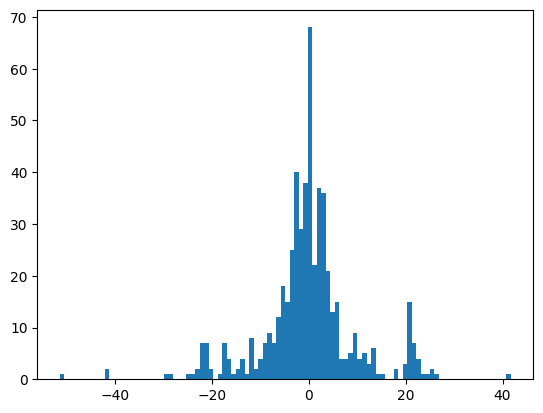

In [21]:
theta_error_list = np.asarray(theta_error_list)
np.save("theta_error_list", theta_error_list)

theta_error_listM = theta_error_list[abs(theta_error_list)<1]
plt.hist(theta_error_list, bins=100)
plt.show()